In [1]:
#Part 1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
dfN = pd.read_csv('Part1 - Normal.csv')
dfH= pd.read_csv('Part1 - Type_H.csv')
dfS=pd.read_csv('Part1 - Type_S.csv')
df = pd.concat([dfS,dfH,dfN],axis=0).reset_index().drop('index',axis=1)
print(df.shape) #Exploring the shape of final dataframe

(310, 7)


In [4]:
print(df['Class'].value_counts()) #We've to convert Nrml to Normal, type_h to Type_H and tp_s to Type_S

Type_S    133
Normal     73
Type_H     37
Nrmal      27
type_h     23
tp_s       17
Name: Class, dtype: int64


In [5]:
df['Class'] = df['Class'].replace({'Nrmal':'Normal','type_h':'Type_H','tp_s':'Type_S'})
df['Class'].value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

In [6]:
df.isna().any() #No NaN values are present

P_incidence    False
P_tilt         False
L_angle        False
S_slope        False
P_radius       False
S_Degree       False
Class          False
dtype: bool

<AxesSubplot:>

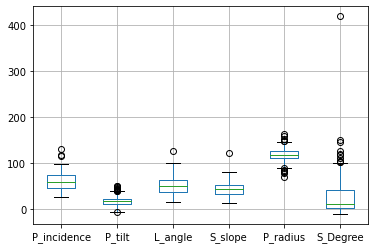

In [7]:
df.boxplot() #Few outliers are present in every variable

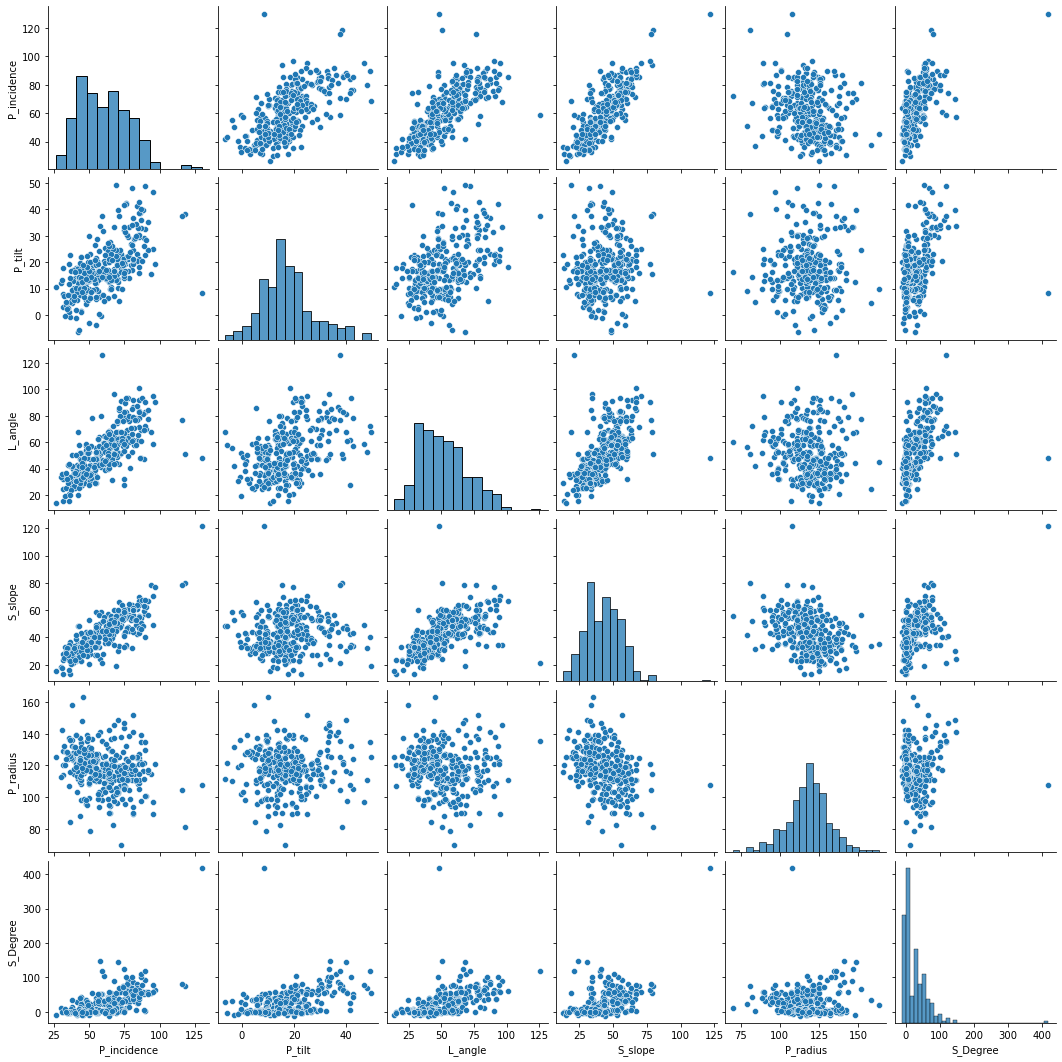

In [8]:
sns.pairplot(df)

In [9]:
#Judging by the general scatterplots for all variables as well, we can say that there are several outliers present in the data

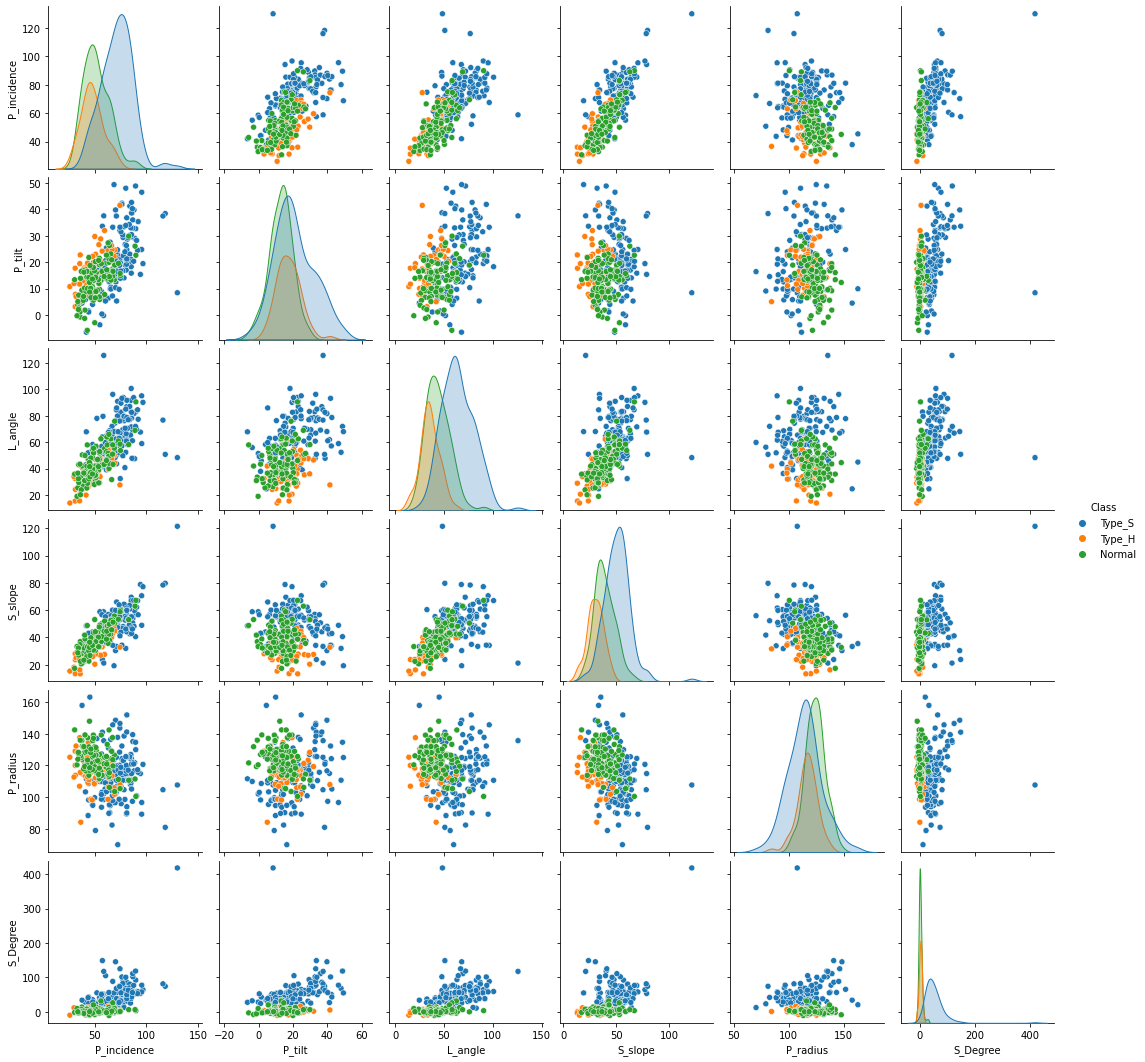

In [10]:
sns.pairplot(df,hue='Class')

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

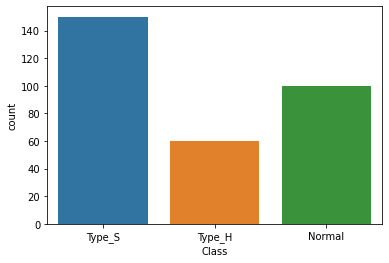

In [11]:
sns.countplot(df['Class']) #We can see that a little bit uneven distribution of target variable is present in the data, which might lead to biased predictions towards Type_S result

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


In [52]:
#Separating predictors and target variables
X = df.drop('Class',axis=1)
y=df['Class']

#At this stage, normalizing is not required as all of the variables are having more or less similar range of values. Thus, continuing with the original values

#Getting training and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [53]:
from sklearn.neighbors import KNeighborsClassifier

NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' ) #Initially testing the model with 5 neighbors

NNH.fit(X_train,y_train)

KNeighborsClassifier(weights='distance')

In [54]:
NNH.score(X_train,y_train) #Accuracy for training data

1.0

In [55]:
pred_test = NNH.predict(X_test)
pred_train = NNH.predict(X_train)
NNH.score(X_test, y_test) #Accuracy for testing data

0.7956989247311828

Confusion Matrix for training data


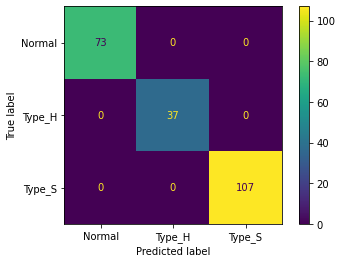

In [56]:
from sklearn import metrics

print("Confusion Matrix for training data")
cm=metrics.confusion_matrix(y_train, pred_train)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=NNH.classes_)
disp.plot() #100% accuracy for training data

Confusion Matrix for test data


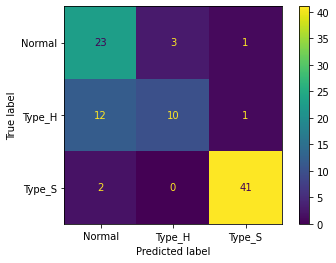

In [57]:
from sklearn import metrics

print("Confusion Matrix for test data")
cm=metrics.confusion_matrix(y_test, pred_test)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=NNH.classes_)
disp.plot() #We can see that the algorithm has misclassified many labels, which is an indicator that we've overfit the model on the training data

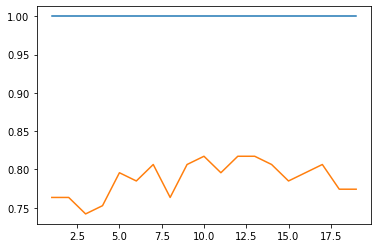

In [58]:
#In order to find out the best possible value of k according to the accuracy score, plot the values of accuracy of each model for k=1 to k=20
scores_train =[]
scores_test=[]
for k in range(1,20):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_train, y_train)
    scores_test.append(NNH.score(X_test, y_test))
    scores_train.append(NNH.score(X_train, y_train))

plt.plot(range(1,20),scores_train) #The accuracy for training data stays the same, irrespective of the value of k.
plt.plot(range(1,20),scores_test) #From the plot, we can see that for the value of k=10, the test data acuracy is highest.

In [59]:
#Therefore considering k=10 as the final value of k for this model.
from sklearn.neighbors import KNeighborsClassifier

NNH = KNeighborsClassifier(n_neighbors= 10 , weights = 'distance' ) #Initially testing the model with 5 neighbors

NNH.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [60]:
NNH.score(X_train,y_train) #Accuracy for training data

1.0

In [61]:
pred_test = NNH.predict(X_test)
pred_train = NNH.predict(X_train)
NNH.score(X_test, y_test) #Accuracy for testing data

0.8172043010752689

Confusion Matrix for test data


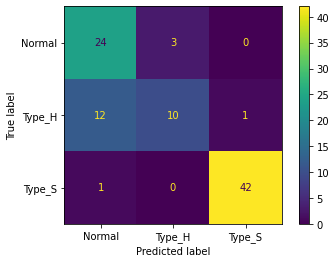

In [62]:
print("Confusion Matrix for test data")
cm=metrics.confusion_matrix(y_test, pred_test)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=NNH.classes_)
disp.plot()

In [63]:
#Presence of outliers might have affected the overall accuracy of the model.
#Let us try to replace the outliers with their nearest whisker values and train the model.
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

P_incidence    26.447401
P_tilt         11.453326
L_angle        26.000000
S_slope        19.348766
P_radius       14.758478
S_Degree       39.683625
dtype: float64


In [64]:
X1 = X.copy()
# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(X1 < Q1 - 1.5 * IQR)[0], np.where(X1 < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    X1.iloc[i,j] = whisker[j]
    
    
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(X1 > Q3 + 1.5 * IQR)[0], np.where(X1 > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    X1.iloc[i,j] = whisker[j]

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.30, random_state=1) 

NNH1 = KNeighborsClassifier(n_neighbors= 10 , weights = 'distance' ) #Initially testing the model with 5 neighbors

NNH1.fit(X1_train,y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [65]:
NNH1.score(X1_test,y_test) #Overall accuracy of the model stays the same, even after removing the outliers

0.8172043010752689

In [66]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

      Normal       0.65      0.89      0.75        27
      Type_H       0.77      0.43      0.56        23
      Type_S       0.98      0.98      0.98        43

    accuracy                           0.82        93
   macro avg       0.80      0.77      0.76        93
weighted avg       0.83      0.82      0.81        93



In [27]:
'''Result:-
   For the value of k=10, for given dataset, we have successfully trained a k-nearest neighbour algorithm,
   with a training accuracy of 100% and testing accuracy of 81%
   
   Suggestions for better results:-
   1. More data is required for better training
   2. Target variable should be balanced equally among all the classes. This can be done by several explicit target balancing
   algorithms, but more data is required than this.
   3. Relatively higher number of outliers were present in the dataset.
   '''

'Result:-\n   For the value of k=10, for given dataset, we have successfully trained a k-nearest neighbour algorithm,\n   with a training accuracy of 100% and testing accuracy of 81%\n   \n   Suggestions for better results:-\n   1. More data is required for better training\n   2. Target variable should be balanced equally among all the classes. This can be done by several explicit target balancing\n   algorithms, but more data is required than this.\n   3. Relatively higher number of outliers were present in the dataset.\n   '

In [28]:
#Part 2

In [29]:
df21 = pd.read_csv('Part2 - Data1.csv').drop('ID',axis=1)
df22 = pd.read_csv('Part2 -Data2.csv').drop('ID',axis=1)

In [30]:
df2 = pd.concat([df21,df22],axis=1).reset_index().drop(['index','ZipCode'],axis=1) #Merging the datasets and dropping the columns, which are not useful for training the algorithm

In [31]:
print(df2.shape) #Exploring the shape of final dataframe

(5000, 12)


In [32]:
df2.dtypes #Exploring the datatypes of all variables

Age                      int64
CustomerSince            int64
HighestSpend             int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [33]:
df2.isna().any() #NaN values are present only in the LoanOnCard column.

Age                    False
CustomerSince          False
HighestSpend           False
HiddenScore            False
MonthlyAverageSpend    False
Level                  False
Mortgage               False
Security               False
FixedDepositAccount    False
InternetBanking        False
CreditCard             False
LoanOnCard              True
dtype: bool

In [34]:
df2['LoanOnCard'] = df2['LoanOnCard'].fillna(0) #Replacing the NaN values with 0

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,25,1,49,4,1.6,1,0,1,0,0,0,0.0
1,45,19,34,3,1.5,1,0,1,0,0,0,0.0
2,39,15,11,1,1.0,1,0,0,0,0,0,0.0
3,35,9,100,1,2.7,2,0,0,0,0,0,0.0
4,35,8,45,4,1.0,2,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0,0.0
4996,30,4,15,4,0.4,1,85,0,0,1,0,0.0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0.0
4998,65,40,49,3,0.5,2,0,0,0,1,0,0.0


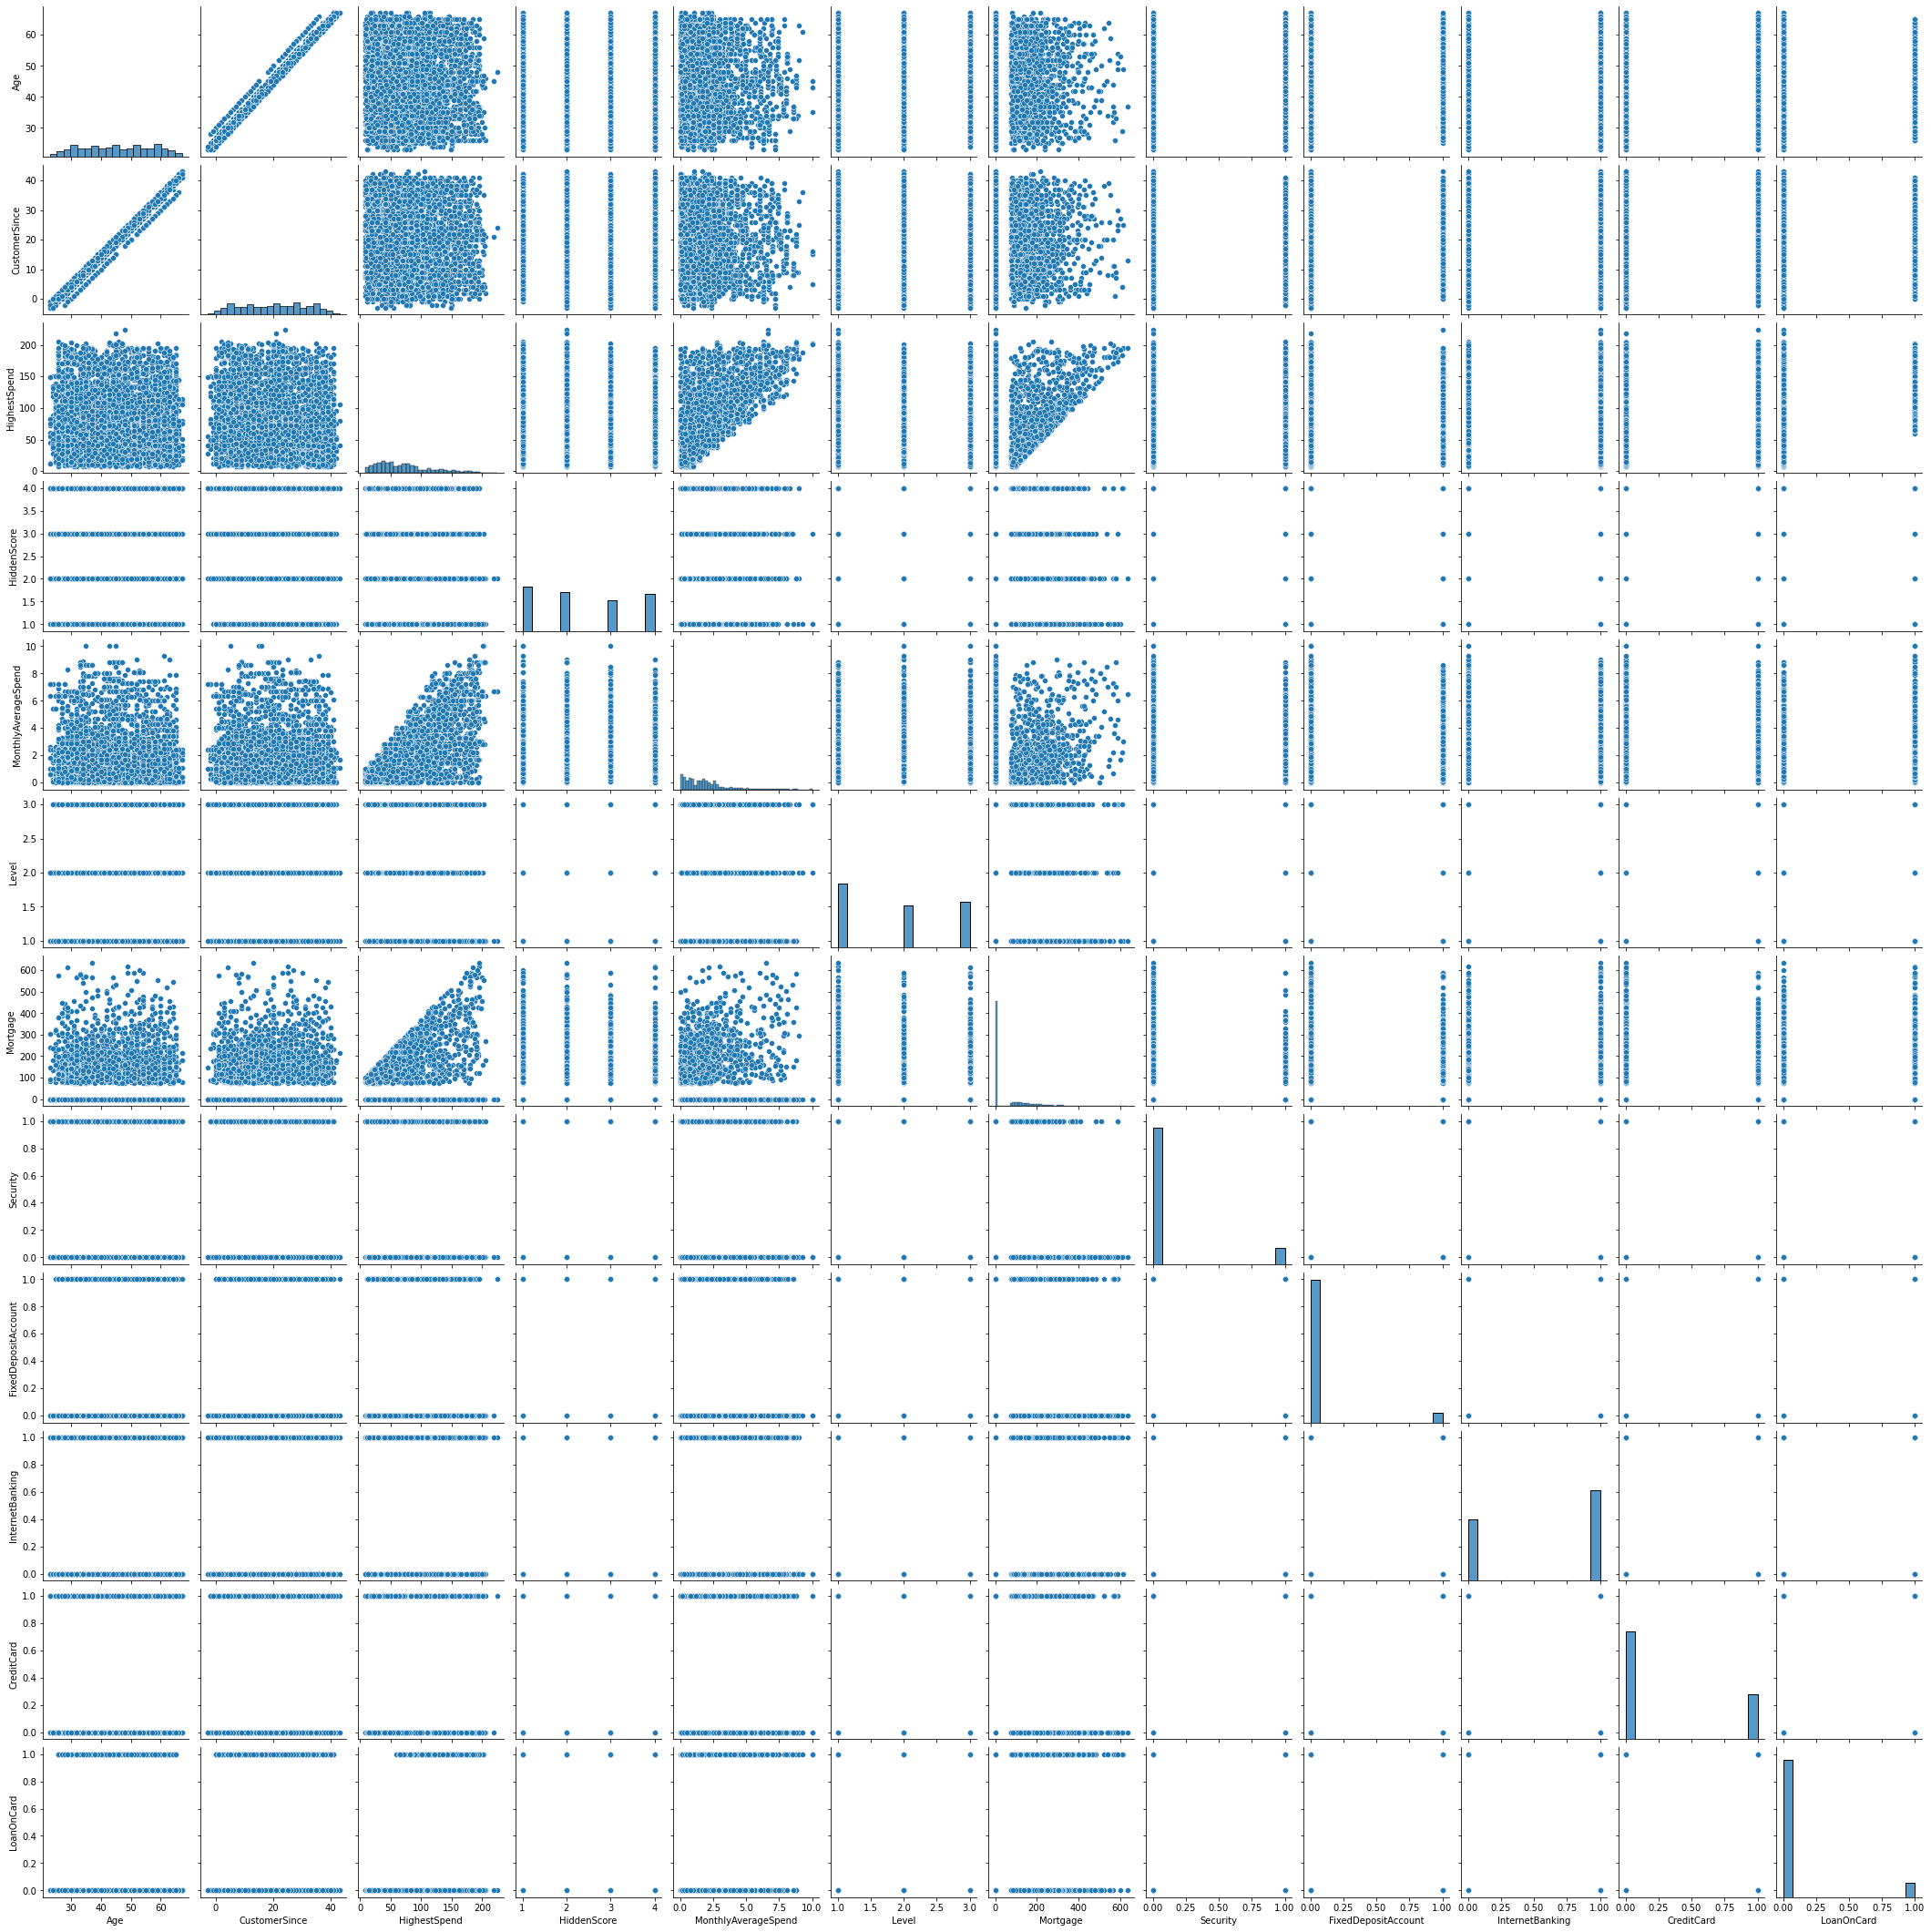

In [35]:
sns.pairplot(df2)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

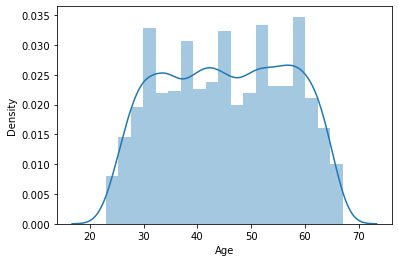

In [36]:
sns.distplot(df2['Age']) #The customers of age group 30 to 60 form almost the entire customer-base of the bank

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


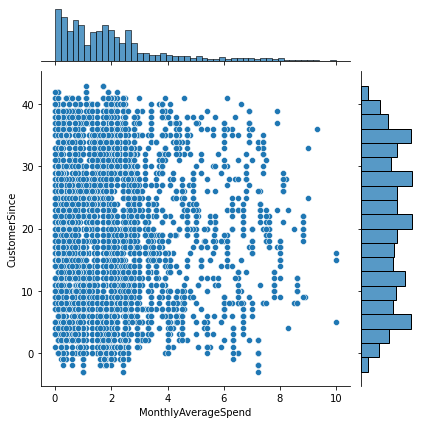

In [37]:
sns.jointplot(df2['MonthlyAverageSpend'],df2['CustomerSince']) #It doesn't matter for how long the customers have been associated with the bank, their spending doesn't depend upon that.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


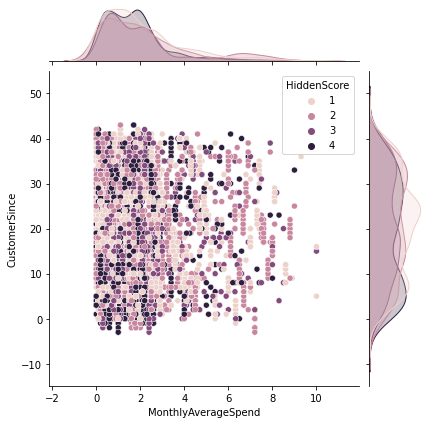

In [38]:
sns.jointplot(df2['MonthlyAverageSpend'],df2['CustomerSince'],hue=df2['HiddenScore'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


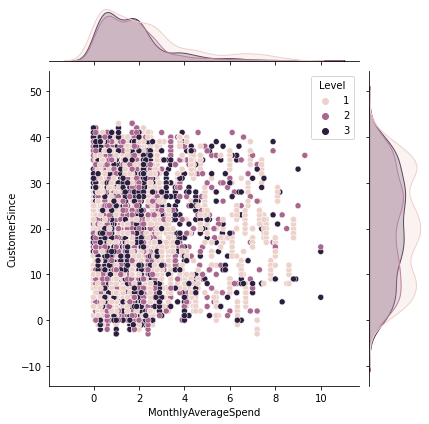

In [39]:
sns.jointplot(df2['MonthlyAverageSpend'],df2['CustomerSince'],hue=df2['Level']) #Again, we can see that there is no specific relationship of the variables Level and HiddenScore with the same categories for the previous plot.

In [40]:
#Separating prectors and target variable
X = df2.drop('LoanOnCard',axis=1)
y=np.reshape(list(df2['LoanOnCard']),(-1,1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1) #Splitting the training and testing datasets.

In [41]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver="liblinear")
logreg.fit(X_train,y_train) #Training the logistic regression model
pred_y_test = logreg.predict(X_test) #Predicitng the test dataset values
pred_y_train = logreg.predict(X_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [42]:
train_score = logreg.score(X_train, y_train)
test_score = logreg.score(X_test, y_test)
print('Accuracy for training dataset: ',train_score)
print('Accuracy for testing dataset: ',test_score)

Accuracy for training dataset:  0.952
Accuracy for testing dataset:  0.9453333333333334


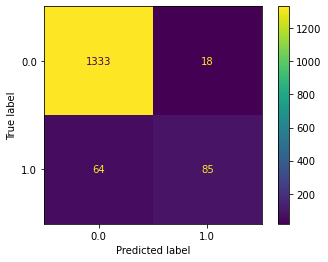

In [43]:
cm=metrics.confusion_matrix(y_test, pred_y_test)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot() #Displayong the confusion matrix for logistic regression mode for test dataset.

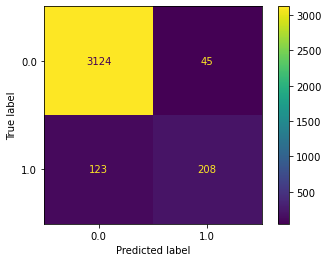

In [44]:
cm1=metrics.confusion_matrix(y_train, pred_y_train)
disp1 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=logreg.classes_)
disp1.plot() #Displayong the confusion matrix for logistic regression mode for training dataset.

In [45]:
print(metrics.classification_report(y_test,pred_y_test))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1351
         1.0       0.83      0.57      0.67       149

    accuracy                           0.95      1500
   macro avg       0.89      0.78      0.82      1500
weighted avg       0.94      0.95      0.94      1500



In [47]:
#Training the SVM model for the same data
from sklearn import svm
clf = svm.SVC(gamma=0.025, C=3) #Initially keeping the hyperparameters gamma=0.025 and C=3
clf.fit(X_train,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=3, gamma=0.025)

In [48]:
y_pred_test_svm = clf.predict(X_test)
y_pred_train_svm = clf.predict(X_train)

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,1,0


In [49]:
train_score=clf.score(X_train,y_train)
test_score=clf.score(X_test,y_test)
print("Accuracy for training data: ",train_score)
print("Accuracy for test data: ",test_score) #Extremely good accuracy for training data, whereas somewhat poorer accuracy for testing data, which might be the result of the model overfitting into training data

Accuracy for training data:  0.9902857142857143
Accuracy for test data:  0.9273333333333333


In [50]:
#Let's try for different values of gamma and C, in order to get the best possible model, by judging from individual accuracies and f1-scores.
'''C1=[0.001, 0.01, 0.1, 1, 10, 100]
gam=[0.001, 0.01, 0.1, 1, 10, 100]
df3=pd.DataFrame([],columns=['C','gamma','training_accuracy','testing_accuracy','f1'])
for i in C1:
    for j in gam:
        clf = svm.SVC(gamma=j, C=i)
        clf.fit(X_train,y_train.ravel())
        y_pred_test_svm = clf.predict(X_test)
        train_acc = clf.score(X_train,y_train)
        test_acc=clf.score(X_test,y_test)
        f1 = metrics.f1_score(y_test,y_pred_test_svm)
        df4=pd.DataFrame([[i,j,train_acc,test_acc,f1]],columns=['C','gamma','training_accuracy','testing_accuracy','f1'])
        df5=pd.concat([df4, df3])'''
'''This approcah is computationally extremely expensive, thus commenting'''

'This approcah is computationally extremely expensive, thus commenting'

In [51]:
print(metrics.classification_report(y_test,y_pred_test_svm))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      1351
         1.0       0.82      0.34      0.48       149

    accuracy                           0.93      1500
   macro avg       0.88      0.67      0.72      1500
weighted avg       0.92      0.93      0.91      1500



In [ ]:
'''Result:
   By looking at the accuracies of training and test datasets for both logistic regression and SVM models, the SVM model
   clearly gives better results.
   Tuning the hyperparameters is computationally expensive, thus taking very long time to train individual models, for local
   machine. Therefore, considering the results for default values of hyperparameters for logistic regression, and considering 
   token values of C and gamma for SVM.
   
   Recommendations for better results:
   1. Hyperparameter tuning on more powerful machine like cloud can yield even better results.
   2. Dataset larger than current dataset will yield better performace of the model.
   3. The target variable has extremely higher number of ones than zeroes, therefore we can see clear disparity between the results
   for both the values in classification reports of both the models.